In [1]:
!nvidia-smi

Thu Jan 30 09:03:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 22.8M/22.8M [00:00<00:00, 43.2MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,810,560 parameters, 0 gradients, 42.6 GFLOPs

100% 104k/104k [00:00<00:00, 33.3MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 54.0ms
Speed: 16.6ms preprocess, 54.0ms inference, 467.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


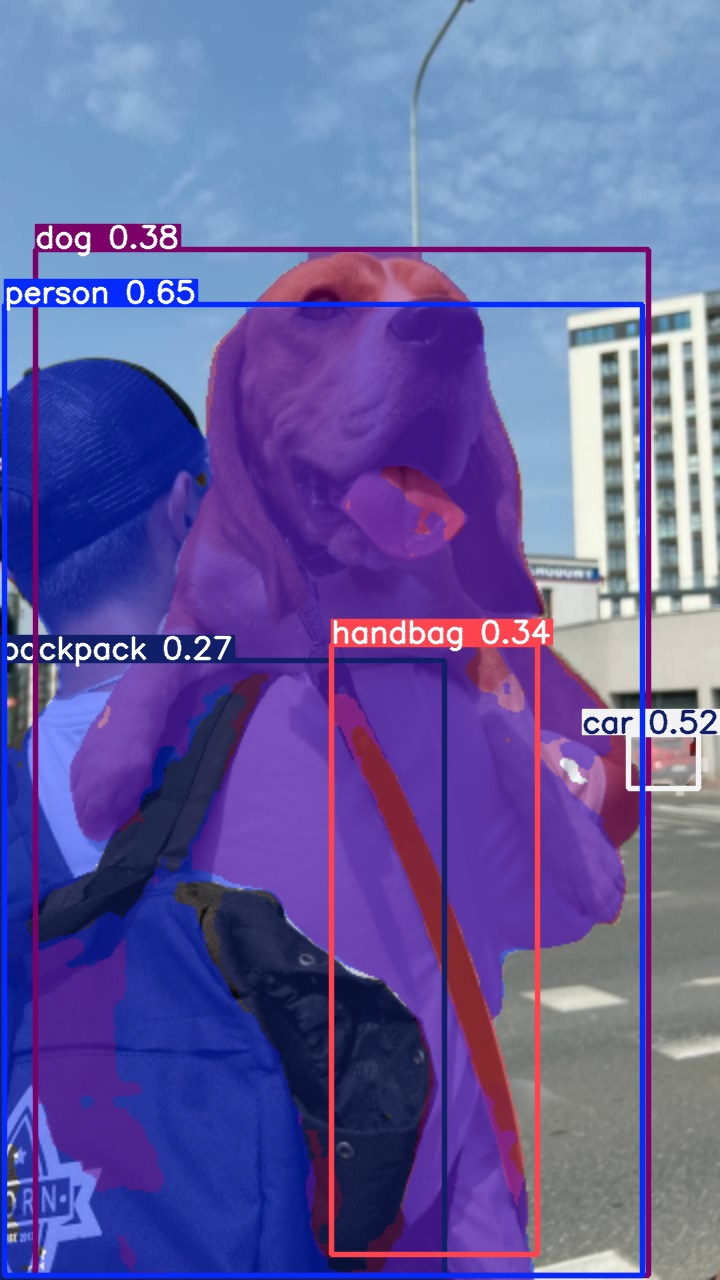

In [6]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c666YpRAbUzjekLy59xD")
project = rf.workspace("minor-project-2-qrehi").project("coral_segmentation-wdpo7")
version = project.version(9)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Coral_Segmentation-9 in yolov8:: 100%|██████████| 3120/3120 [00:00<00:00, 7977.59it/s]


In [8]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.3.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Coral_Segmentation-9/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

/content


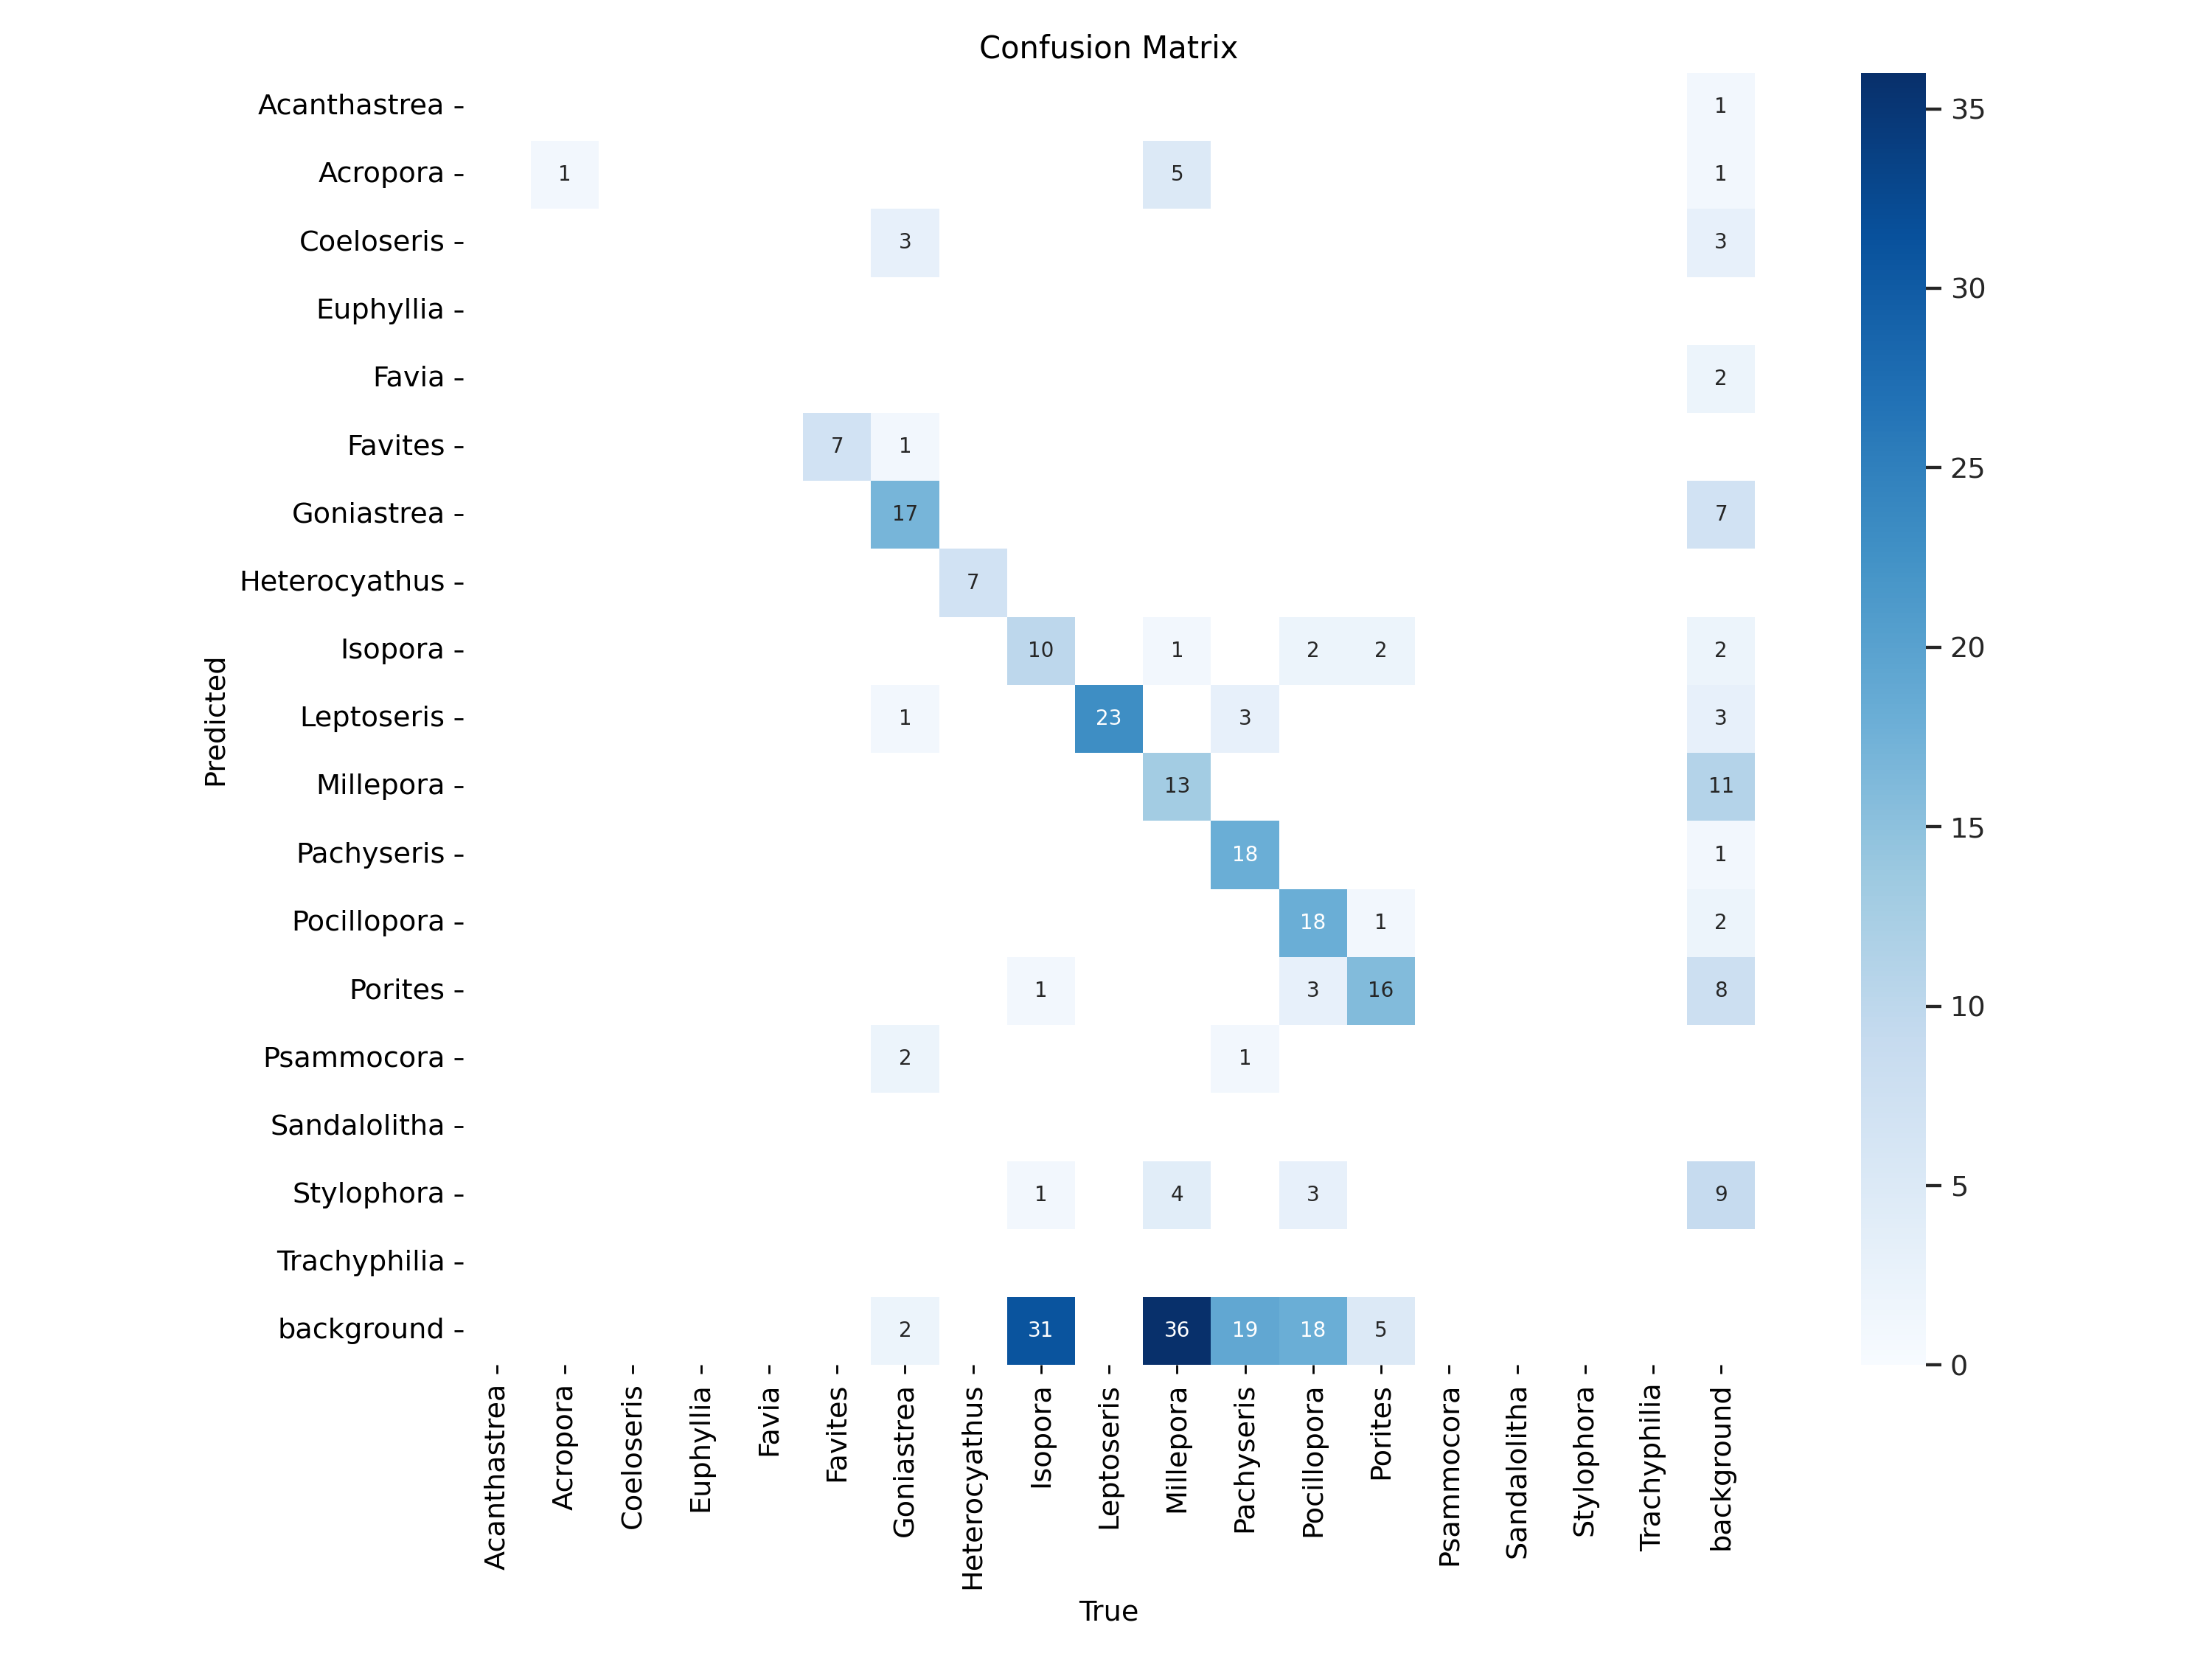

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


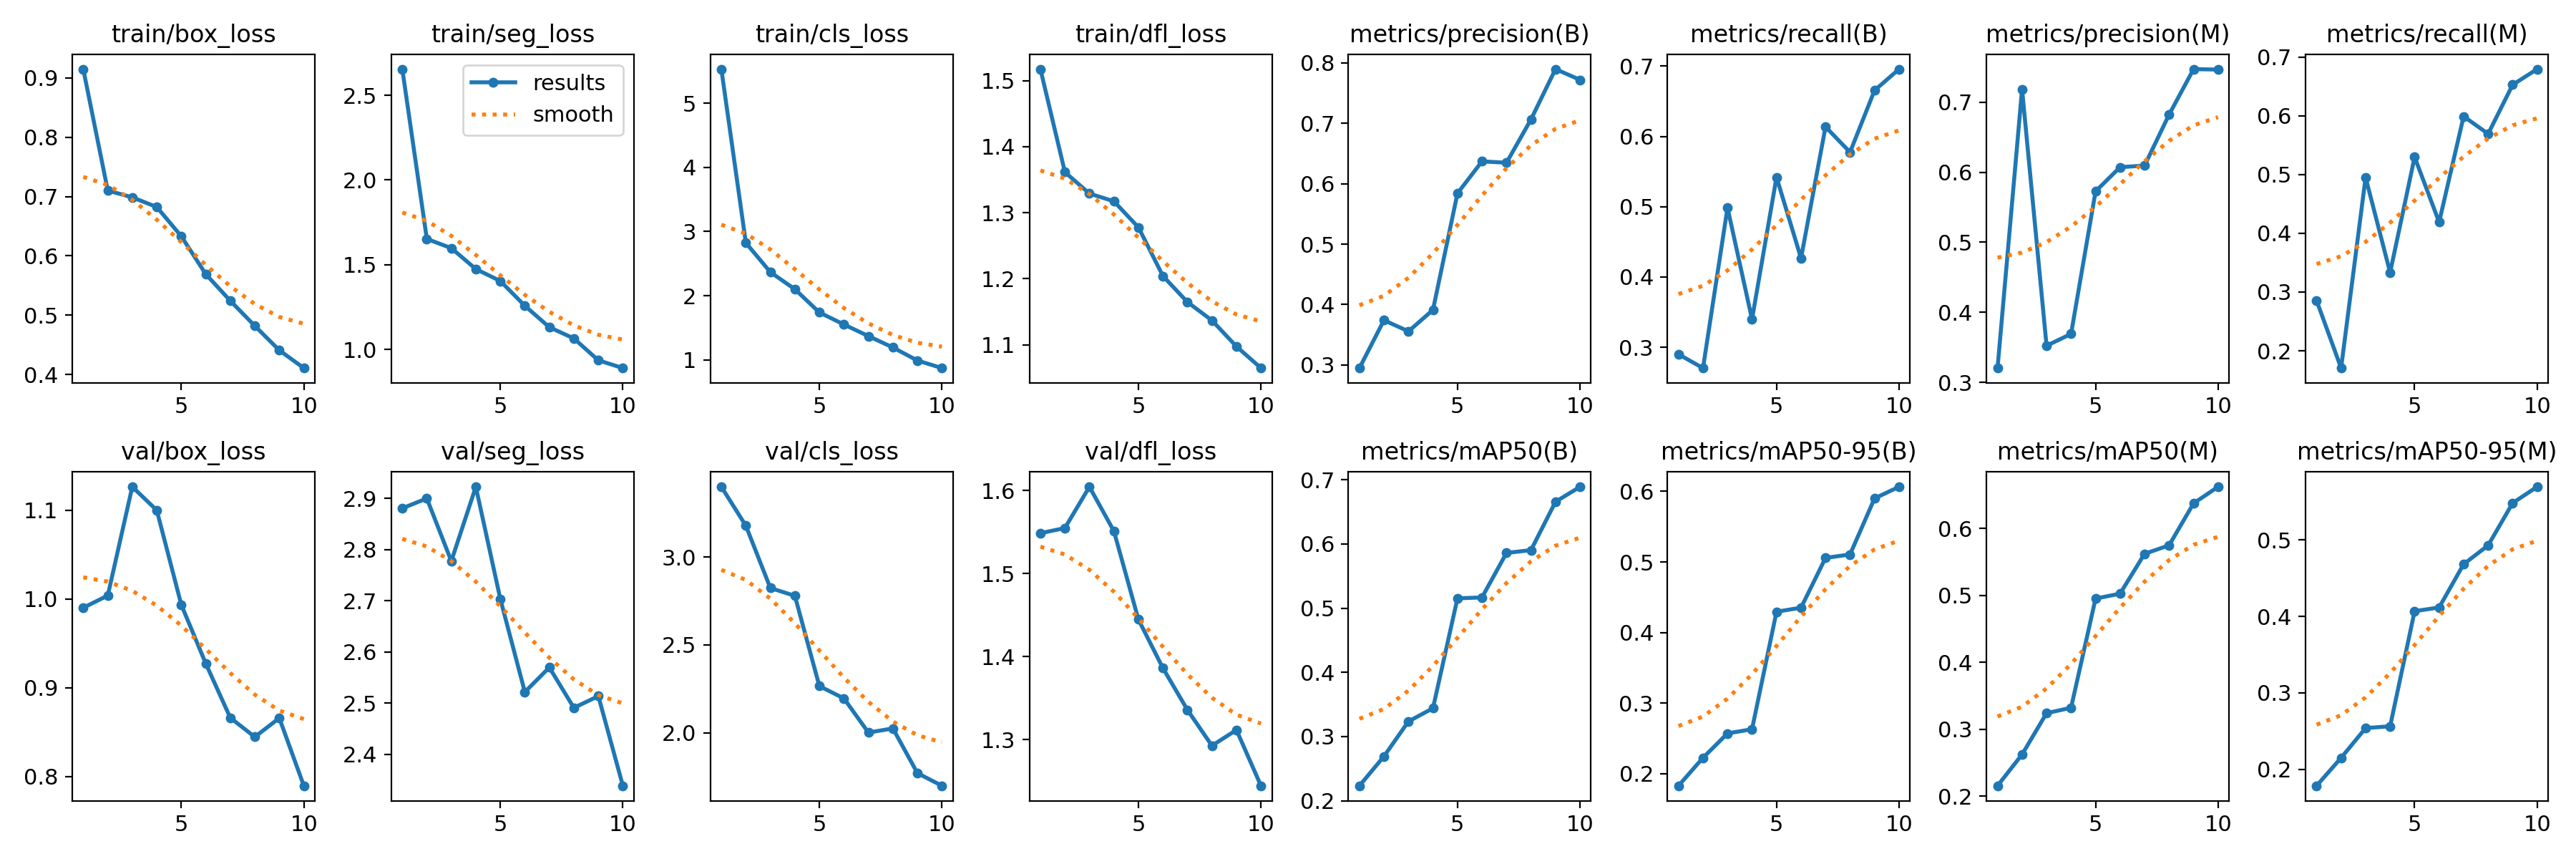

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


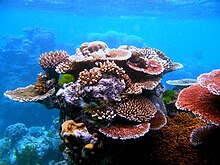

In [12]:
%cd {HOME}
Image(filename='/content/Coral_Outcrop_Flynn_Reef.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,786,566 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/Coral_Segmentation-9/valid/labels.cache... 156 images, 0 backgrounds, 0 corrupt: 100% 156/156 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 10/10 [00:07<00:00,  1.30it/s]
                   all        156        275      0.771      0.696      0.689      0.601      0.746       0.68      0.662      0.569
              Acropora          1          1      0.151          1      0.497      0.448      0.153          1      0.497      0.398
               Favites          7          7      0.832          1      0.995      0.915      0.835          1      0.995      0.923
            Goniastrea         19         26       0.99      0.769      0.904      0.801          1      0.767 

In [14]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,786,566 parameters, 0 gradients, 42.5 GFLOPs

image 1/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.027dd4e7bd5b74b709cc8ad26b872a82.jpg: 640x640 1 Acanthastrea, 21.0ms
image 2/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.214140c8a4a24a6a64beade79414f0c2.jpg: 640x640 1 Acropora, 1 Porites, 21.0ms
image 3/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.4e78d18088822a64896902f942317acc.jpg: 640x640 1 Favites, 20.9ms
image 4/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.575469d0cad41fc40b03cb87370ee6dd.jpg: 640x640 1 Acropora, 20.9ms
image 5/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.b1059e1a98a3413350bbd8e288f62cc7.jpg: 640x640 1 Coeloseris, 20.9ms
image 6/153 /content/Coral_Segmentation-9/test/images/Image_10_jpg.rf.f1f873e7b82d0b301312ddb1c97f9498.jpg: 640x640 1 Styl

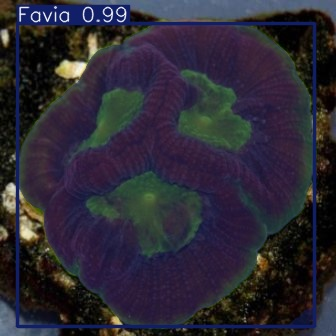

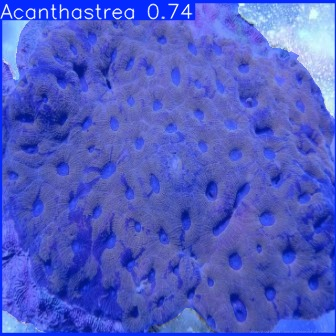

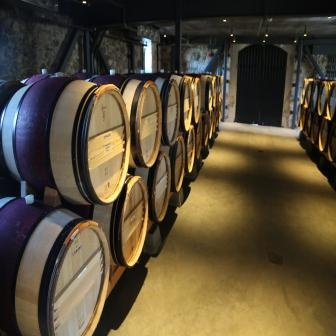

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [18]:
import torch
from ultralytics import YOLO
import cv2

# Load the trained model
model_path = "/content/yolov8n.pt"  # Update the path if needed
model = YOLO(model_path)

# Load an image
image_path = "/content/Coral_Outcrop_Flynn_Reef.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Run inference
results = model(image)

# Display results
for r in results:
    r.show()  # Shows image with segmentation results
    r.save(filename="output1.jpg")  # Saves output image

print("Inference completed. Check 'output.jpg' for results.")



0: 480x640 1 cake, 40.4ms
Speed: 2.9ms preprocess, 40.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Inference completed. Check 'output.jpg' for results.
